<a href="https://colab.research.google.com/github/Adya-Verma/Predicing-signle-gene-genetic-disorder/blob/main/EDA_for_Genetic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train = pd.read_csv('/content/train_genetic_disorders.csv')
data_train = train.copy()

In [ ]:
data_train[data_train.isnull().all(1)].shape
print("Null rows in train:",data_train[data_train.isnull().all(1)].shape[0])

Null rows in train: 0


In [ ]:
traindata=data_train[data_train.isnull().all(1)!=True]
traindata.shape


(16907, 45)

In [ ]:
traindata=traindata.drop(columns=['Patient Id','Patient First Name',
  'Family Name','Father\'s name','Institute Name','Location of Institute',
  'Test 1','Test 2','Test 3','Test 4','Test 5','Parental consent'])


In [ ]:
traindata=traindata.rename(columns={"Genes in mother's side":'defect_mother',
                    'Inherited from father':'defect_father',
                    'Maternal gene':'m_gene',
                    'Paternal gene':'p_gene',
                    'Respiratory Rate (breaths/min)':'resp_rate',
                    'Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parent_consent',
                    'Follow-up':'follow_up',
                    'Birth asphyxia':'birth_asph',
                    'Autopsy shows birth defect (if applicable)':'autopsy',
                    'Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_ill',
                    'H/O radiation exposure (x-ray)':'rad_exp',
                    'H/O substance abuse':'sub_abuse',
                    'Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'prev_preg_anom',
                    'Birth defects':'birth_defects',
                    'Blood test result':'blood_test',
                    'Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass',
                    'Patient Age':'p_age',
                    'Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'m_age',
                    "Father's age":'f_age',
                    'No. of previous abortion':'num_prev_abort',
                    'White Blood cell count (thousand per microliter)':'wbc_count'})

In [ ]:
traindata = traindata[(traindata['genetic_disorder'].isnull()!=True)&(traindata['disorder_subclass'].isnull()!=True)]

#Exploratory Data Analysis

We are performing EDA on the train dataset.

In [ ]:
traindata['genetic_disorder'].value_counts()

Mitochondrial genetic inheritance disorders     7037
Single-gene inheritance diseases                5314
Multifactorial genetic inheritance disorders    1451
Name: genetic_disorder, dtype: int64

##Box Plot
This plot shows the age of patients with different genetic disorders using a box and whisker plot. Each box represents the middle 50% of ages for a given disorder, with the line inside the box showing the median age. The whiskers extend to show the range of ages, but outliers (unusually high or low ages) are shown as dots outside the whiskers. This plot helps us compare the ages of patients with different genetic disorders and identify any differences or unusual ages.

<Axes: xlabel='genetic_disorder', ylabel='p_age'>

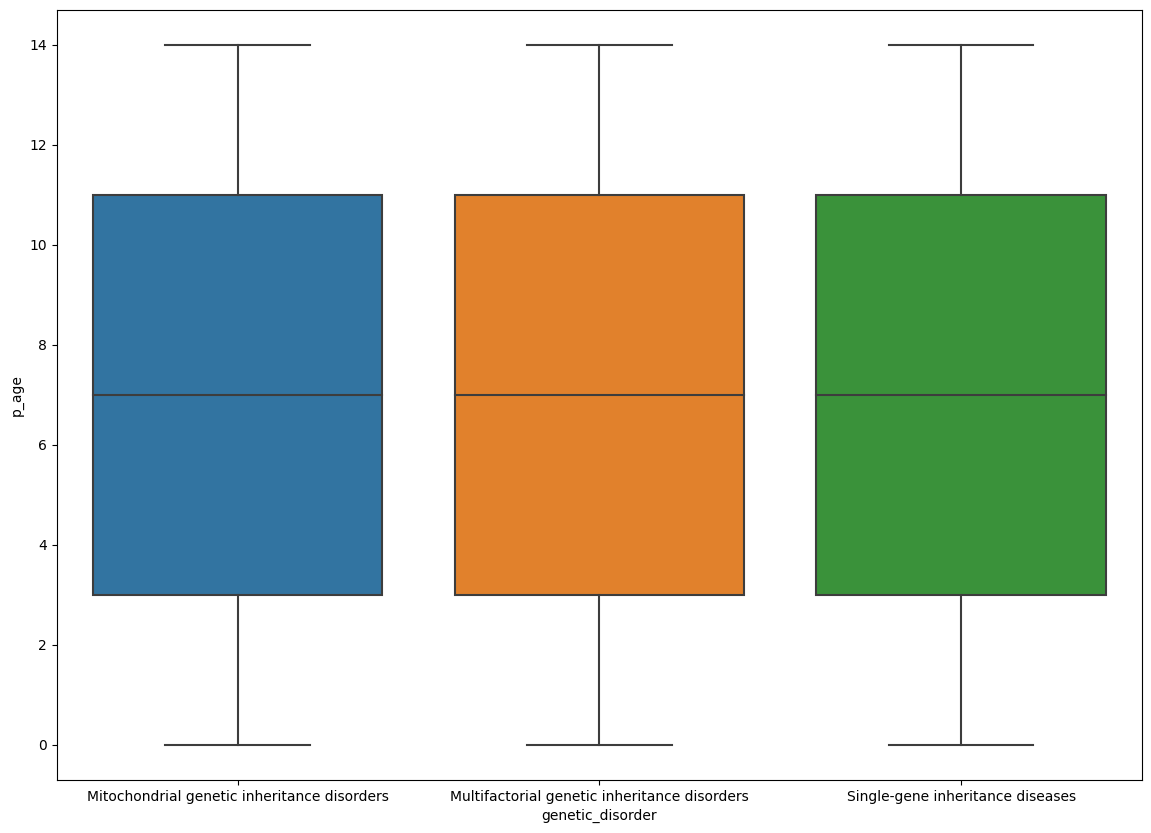

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='genetic_disorder', y='p_age', data=traindata)

##Bar Graphs

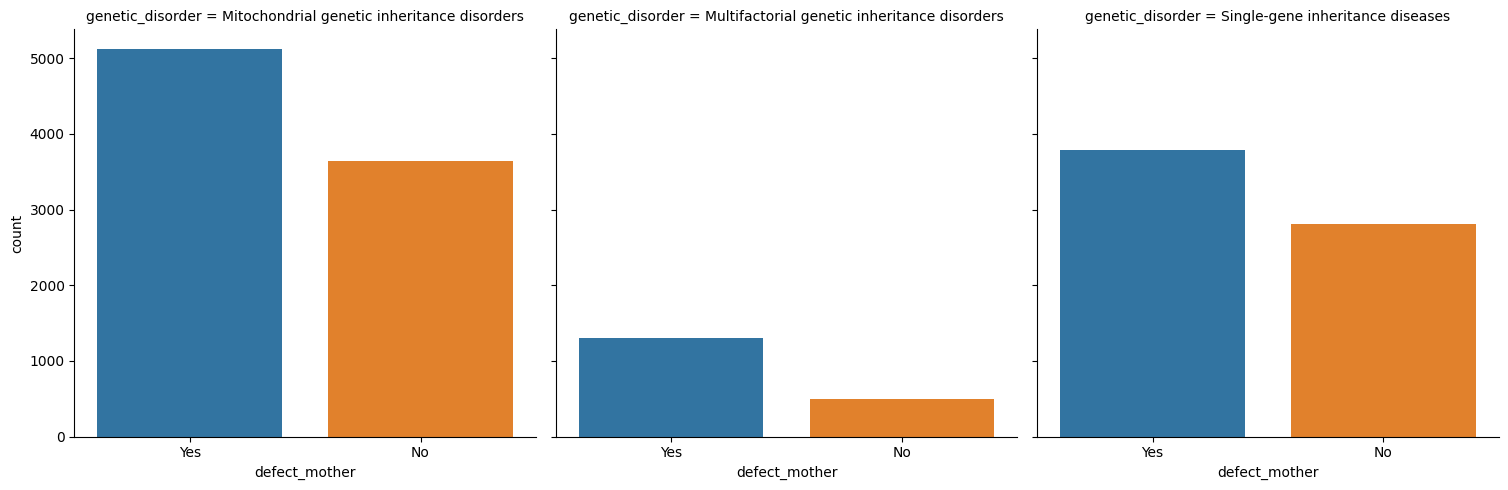

In [ ]:
filtered_data = traindata[traindata['genetic_disorder'] == 'Single gene inheritence diseases']

sns.catplot(x="defect_mother", col="genetic_disorder", col_wrap=4,
  data=traindata, kind="count", height=5, aspect=1.0)

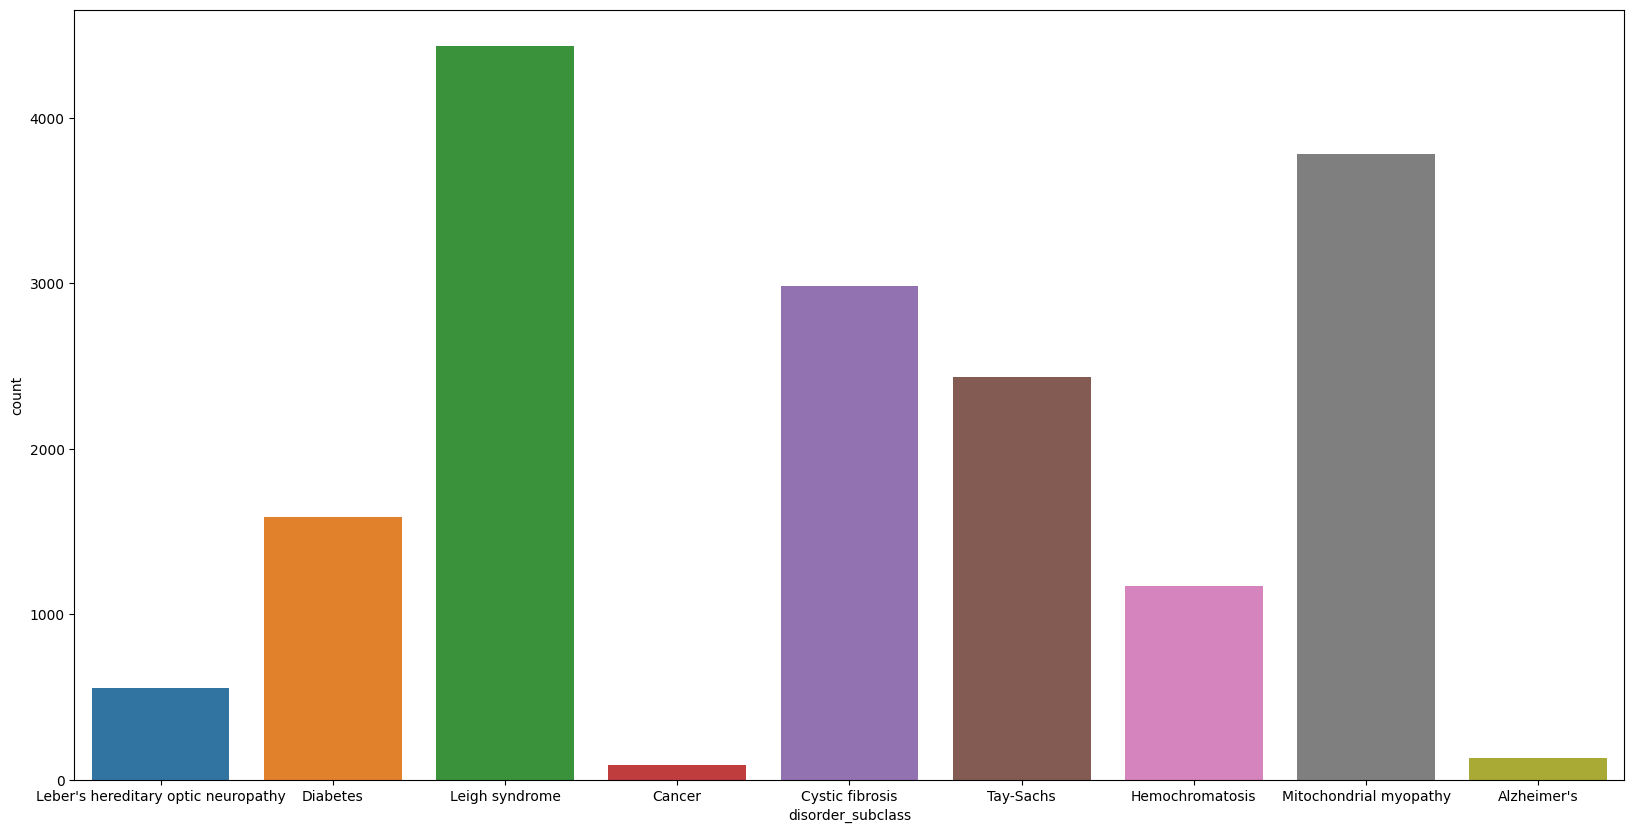

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'disorder_subclass', data = traindata);

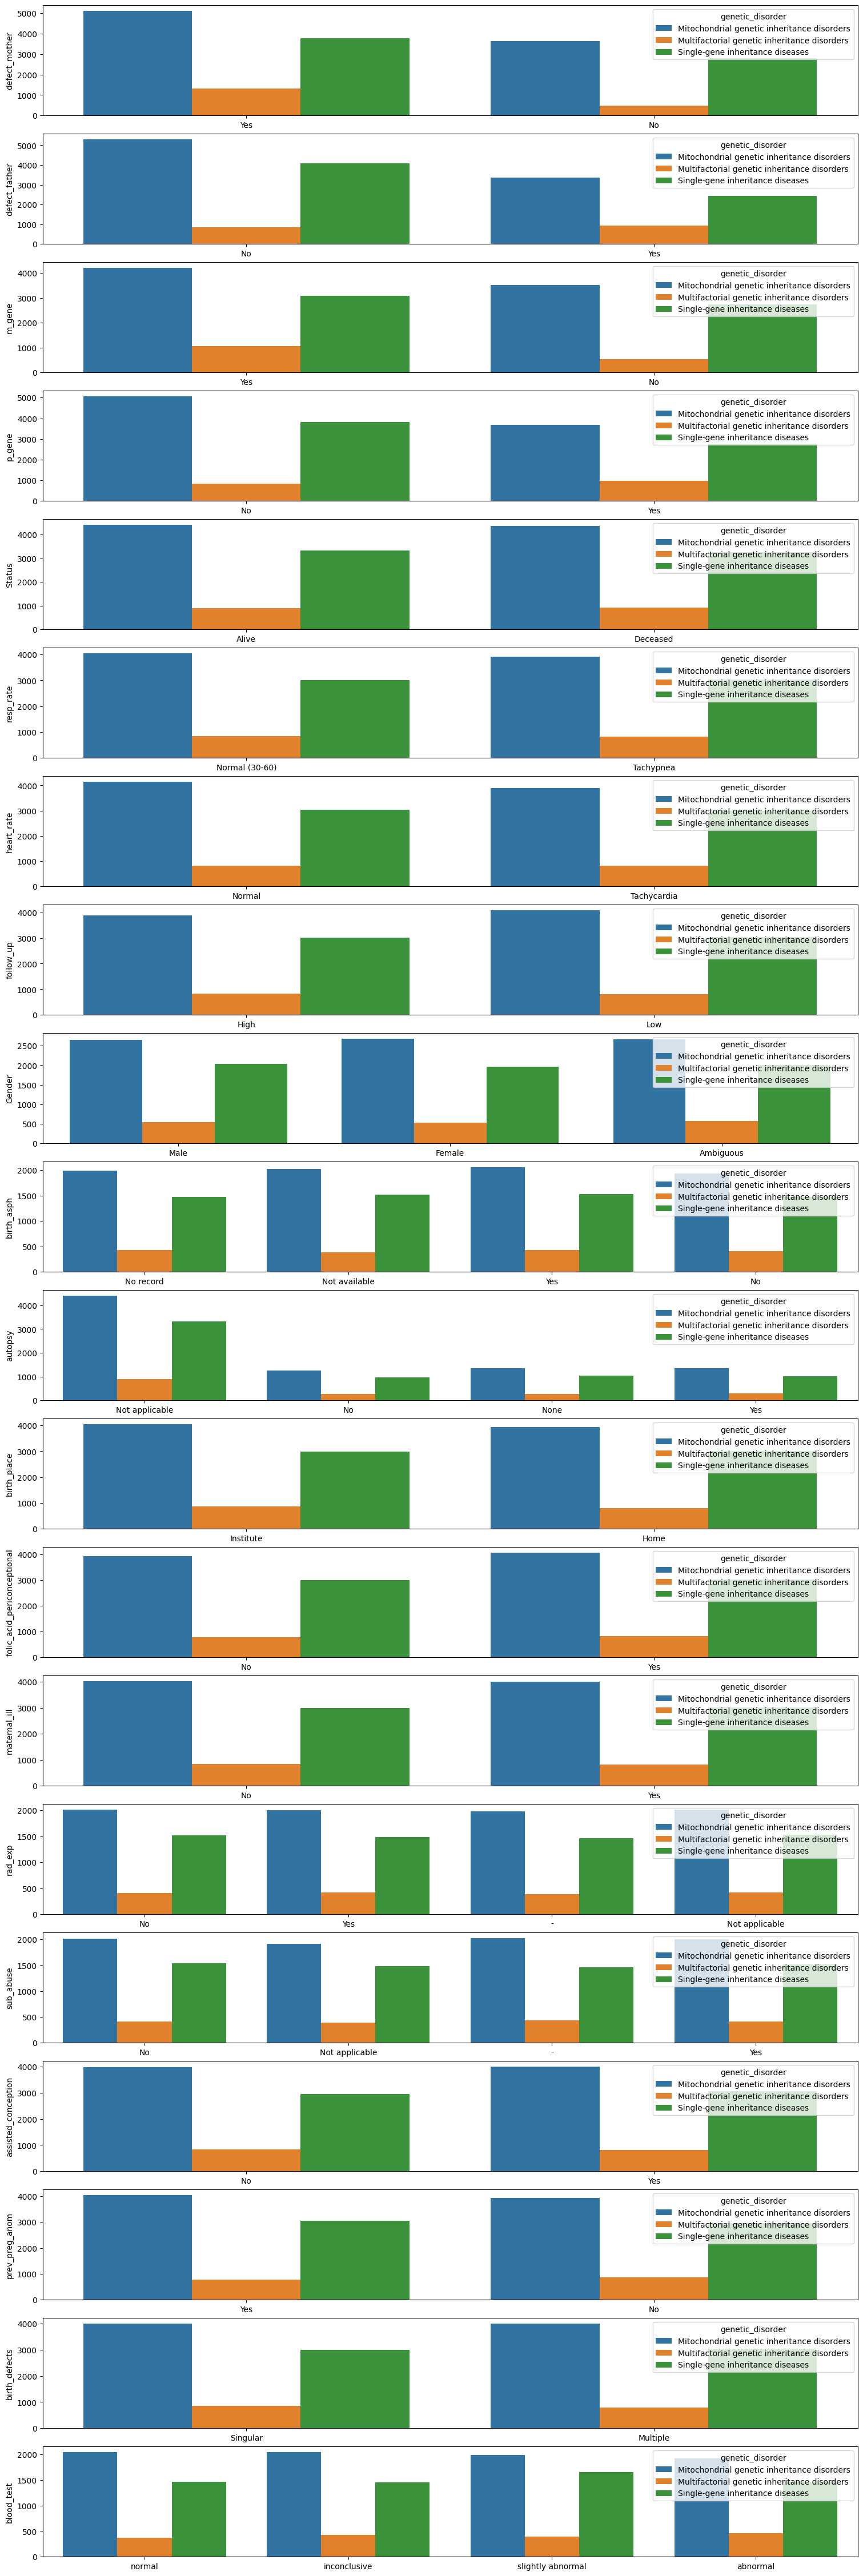

In [ ]:
cat_cols=['defect_mother', 'defect_father', 'm_gene',
       'p_gene', 'Status', 'resp_rate', 'heart_rate', 'follow_up',
       'Gender', 'birth_asph', 'autopsy', 'birth_place',
       'folic_acid_periconceptional', 'maternal_ill', 'rad_exp',
       'sub_abuse', 'assisted_conception',
       'prev_preg_anom', 'birth_defects', 'blood_test']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 45), constrained_layout = True)

for i, var in enumerate(cat_cols):
    sns.countplot(data = traindata, x = var, hue = 'genetic_disorder', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

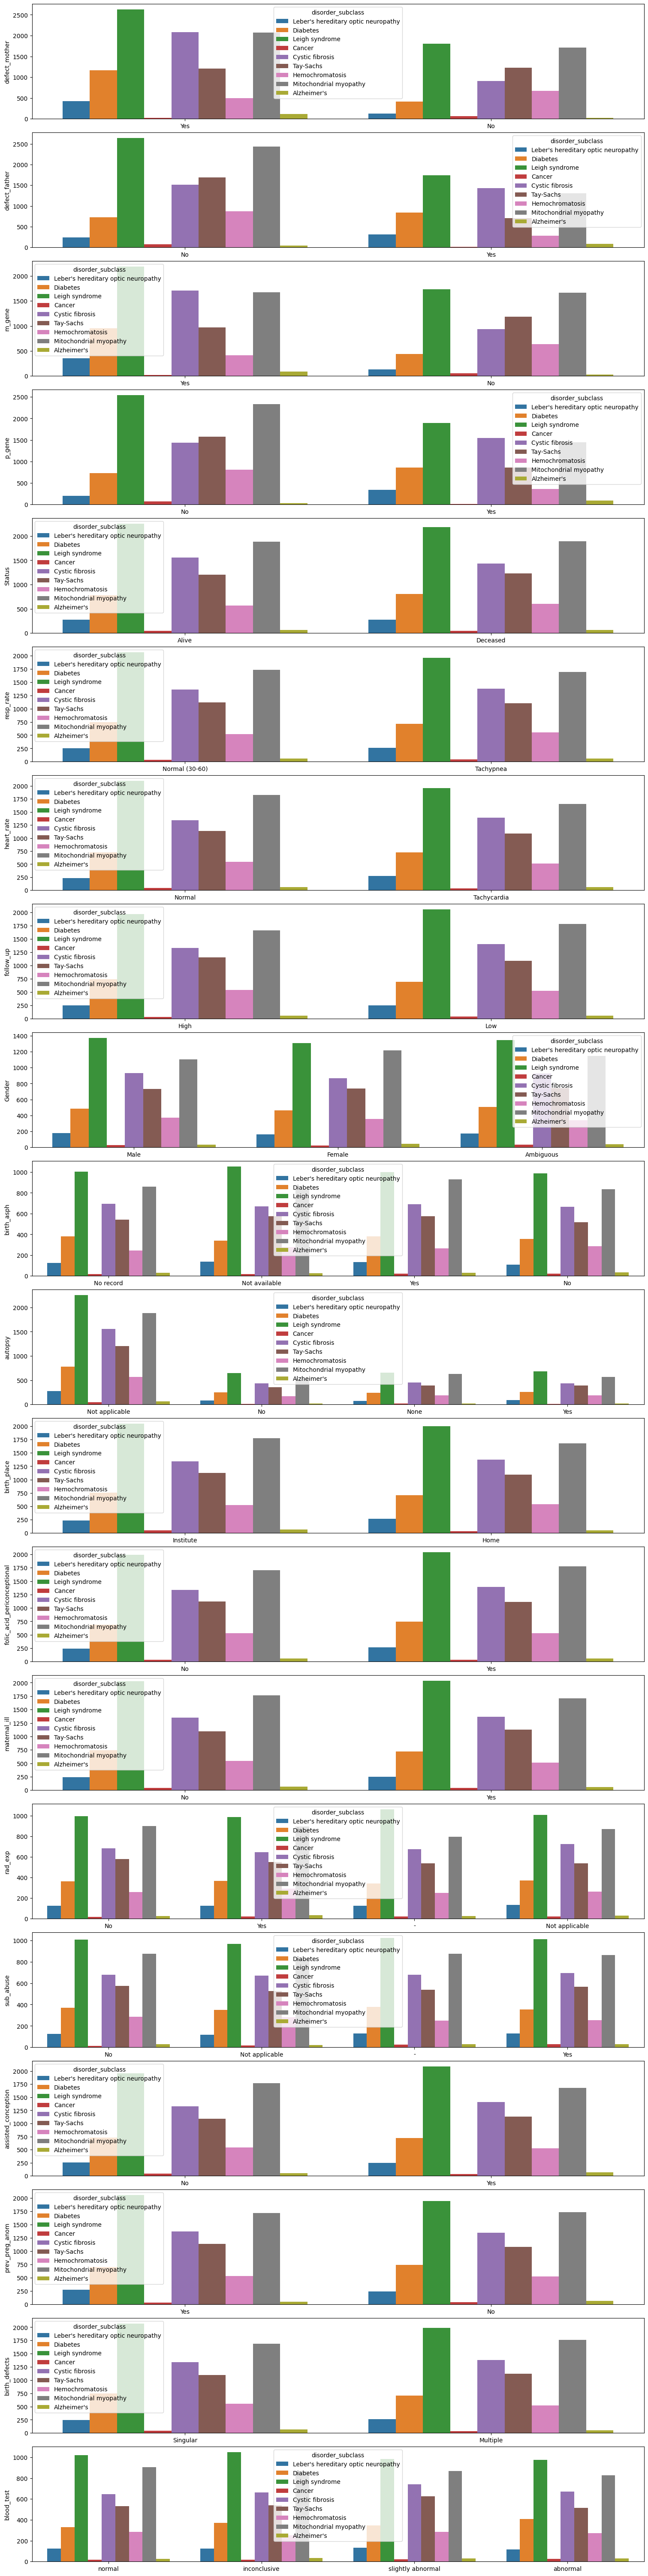

In [ ]:
cat_cols=['defect_mother', 'defect_father', 'm_gene',
       'p_gene', 'Status', 'resp_rate', 'heart_rate', 'follow_up',
       'Gender', 'birth_asph', 'autopsy', 'birth_place',
       'folic_acid_periconceptional', 'maternal_ill', 'rad_exp',
       'sub_abuse', 'assisted_conception',
       'prev_preg_anom', 'birth_defects', 'blood_test']

fig, ax = plt.subplots(len(cat_cols),  figsize = (15, 60), constrained_layout = True)

for i, var in enumerate(cat_cols):
    sns.countplot(data = traindata, x = var, hue = 'disorder_subclass', ax = ax[i], linewidth = 1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

##Histogram

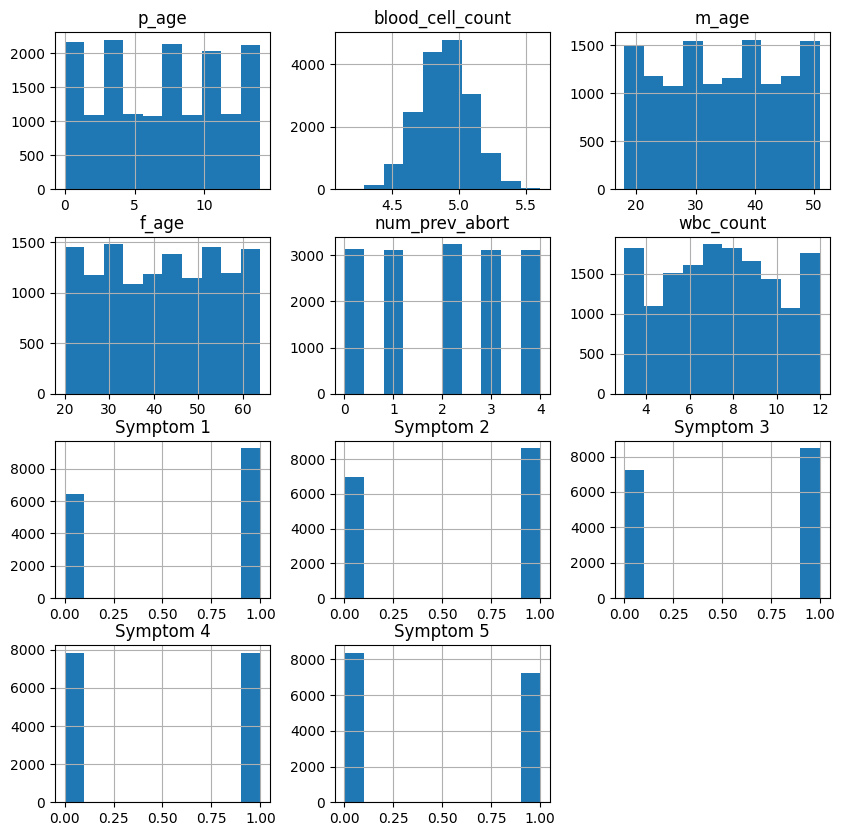

In [ ]:
hist = traindata.hist(bins=10,figsize =(10,10))

##Box Plot for each column with numerical value

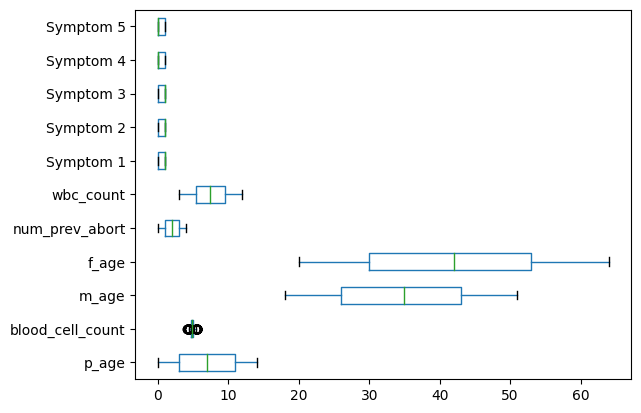

In [ ]:
boxplot = traindata.boxplot(grid=False, vert=False,fontsize=10)

##Pie Chart

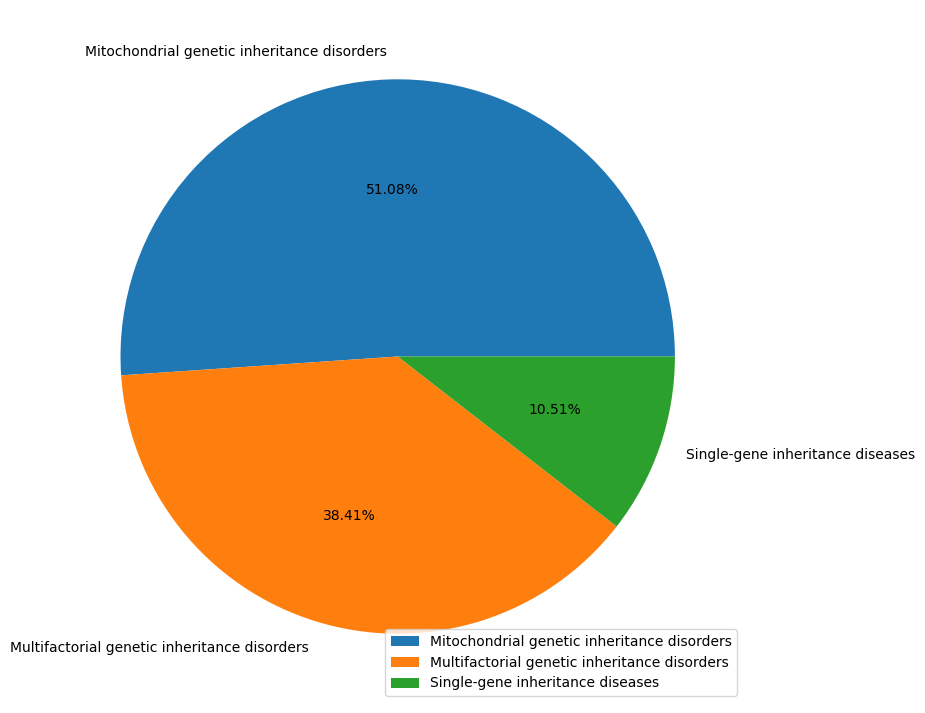

In [ ]:
GD_labels = traindata['genetic_disorder'].unique()
GD_values = traindata['genetic_disorder'].value_counts()
plt.figure(figsize=(9,9))
#df['Genetic_Disorder'].value_counts().plot(kind='pie')
plt.pie(GD_values, labels=GD_labels, autopct='%1.2f%%')
plt.legend(loc = 'lower right')